In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, Input
import matplotlib.pyplot as plt

2023-11-27 23:08:01.228188: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('aadr.us.txt')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data = data[['Close']]

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

In [4]:
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = data[i+sequence_length:i+sequence_length+1]
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

In [5]:
sequence_length = 10
x,y = create_sequences(data_scaled, sequence_length)

In [6]:
split = int(0.7 * len(data))
x_train, x_test, y_train, y_test = x[:split], x[split:], y[:split], y[split:]

In [7]:
model = Sequential()
model.add(Input((x.shape[1], x.shape[2])))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train[:, 0], epochs=50, batch_size=32, validation_split=0.3)


2023-11-27 23:08:15.319286: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-11-27 23:08:15.503811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-27 23:08:15.504490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-27 23:08:15.5

Epoch 1/50


2023-11-27 23:08:15.843070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-27 23:08:15.843977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-27 23:08:15.845000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

23/24 [===========================>..] - ETA: 0s - loss: 0.0163

2023-11-27 23:08:18.750276: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-27 23:08:18.753159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-27 23:08:18.755265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

24/24 [==============================] - 4s 84ms/step - loss: 0.0157 - val_loss: 0.0101
Epoch 2/50
24/24 [==============================] - 1s 51ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/50
24/24 [==============================] - 1s 56ms/step - loss: 8.2562e-04 - val_loss: 4.2826e-04
Epoch 4/50
24/24 [==============================] - 1s 35ms/step - loss: 6.0973e-04 - val_loss: 4.3622e-04
Epoch 5/50
24/24 [==============================] - 1s 41ms/step - loss: 5.1195e-04 - val_loss: 3.2849e-04
Epoch 6/50
24/24 [==============================] - 3s 110ms/step - loss: 5.2157e-04 - val_loss: 3.7673e-04
Epoch 7/50
24/24 [==============================] - 3s 129ms/step - loss: 4.7978e-04 - val_loss: 3.8445e-04
Epoch 8/50
24/24 [==============================] - 3s 129ms/step - loss: 4.5815e-04 - val_loss: 3.2450e-04
Epoch 9/50
24/24 [==============================] - 1s 51ms/step - loss: 4.5993e-04 - val_loss: 3.6085e-04
Epoch 10/50
24/24 [==============================] - 2s 70ms/

In [8]:
predictions = model.predict(x_test)

15/15 [==============================] - 0s 4ms/step


2023-11-27 23:11:33.473629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-27 23:11:33.474547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-27 23:11:33.475476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [9]:
predictions_inv = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test[:, 0])


print("y_test shape:", y_test_inv.shape)
print("predictions shape:",predictions_inv.shape)
mse = mean_squared_error(y_test_inv, predictions_inv)
mse

y_test shape: (460, 1)
predictions shape: (460, 1)


1.4433406316215007

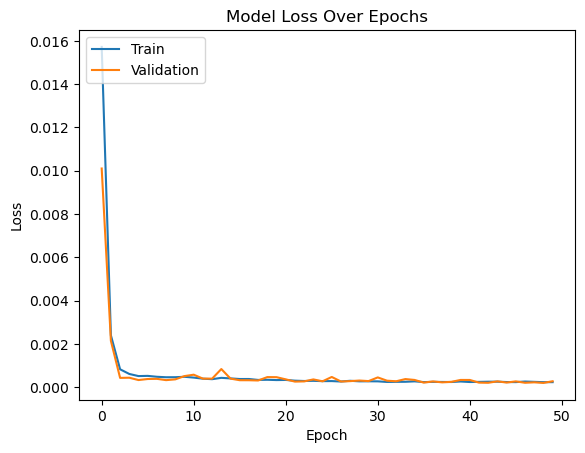

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

/tmp/ipykernel_125109/3691660273.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


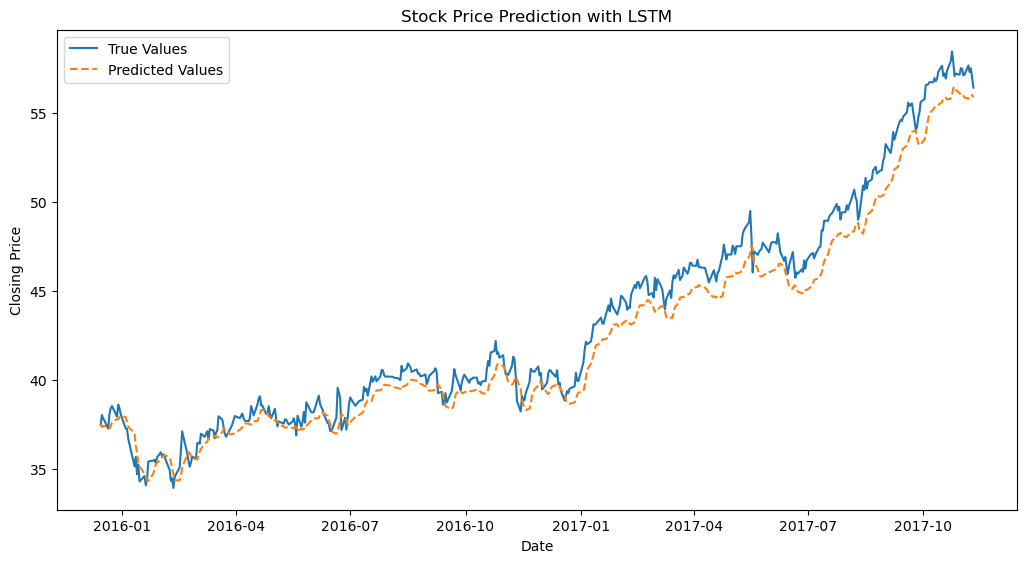

In [17]:
fig = plt.figure(figsize=(12,6))
axes1 = fig.add_axes((0.1, 0.1, 0.8,0.8))
axes1.plot(data.index[-len(y_test_inv):], y_test_inv, label='True Values')
axes1.plot(data.index[-len(predictions_inv):], predictions_inv, label='Predicted Values', linestyle='dashed')
axes1.set_xlabel('Date')
axes1.set_ylabel("Closing Price")
fig.tight_layout()
plt.title('Stock Price Prediction with LSTM')
axes1.legend()
plt.show()

In [13]:
future_sequence = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
future_predictions = []
future_sequence

future_days = 5

# model.predict(future_sequence)

for _ in range(future_days):
    future_prediction = model.predict(future_sequence)
    future_predictions.append(future_prediction[0,0])
    future_sequence = np.append(future_sequence[:, 1:, :], [future_prediction], axis=1)

1/1 [==============================] - 0s 28ms/step


In [14]:
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))


/tmp/ipykernel_125109/3267495841.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


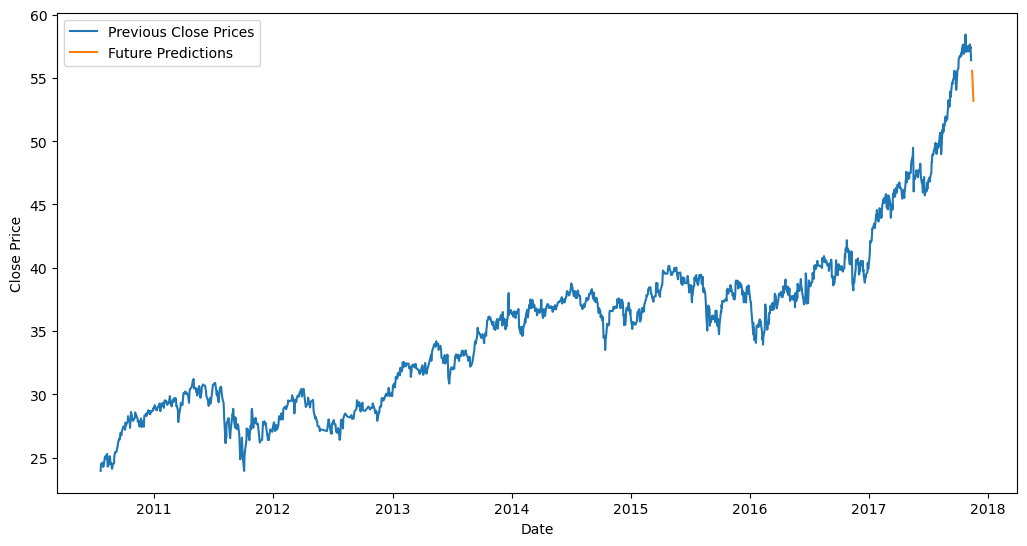

In [15]:
fig2 = plt.figure(figsize=(12,6))
fig2ax1 = fig2.add_axes((0.1, 0.1, 0.8, 0.8))
fig2ax1.plot(data.index, data['Close'], label='Previous Close Prices')
future_dates = pd.date_range(data.index[-1], periods=future_days+1, freq='B')[1:]
fig2ax1.plot(future_dates, future_predictions_inv, label='Future Predictions')
fig2ax1.set_xlabel('Date')
fig2ax1.set_ylabel('Close Price')
fig2ax1.legend()
fig2.show()